In [2]:
#Importing all libraries required for the excercise
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Read and print the dataset (First 5 values)
data = pd.read_csv("MBA.csv")
print(data.head())

   application_id  gender  international   gpa       major      race  gmat  \
0               1  Female          False  3.30    Business     Asian   620   
1               2    Male          False  3.28  Humanities     Black   680   
2               3  Female           True  3.30    Business       NaN   710   
3               4    Male          False  3.47        STEM     Black   690   
4               5    Male          False  3.35        STEM  Hispanic   590   

   work_exp          work_industry admission  
0         3     Financial Services     Admit  
1         5  Investment Management       NaN  
2         5             Technology     Admit  
3         6             Technology       NaN  
4         5             Consulting       NaN  


In [3]:
#Read and print the dataset (Last 5 values)
data = pd.read_csv("MBA.csv")
print(data.tail())

     application_id gender  international   gpa       major      race  gmat  \
494             495   Male          False  3.15  Humanities     White   680   
495             496   Male          False  3.33        STEM  Hispanic   640   
496             497   Male          False  3.28        STEM     White   680   
497             498   Male          False  3.42    Business     White   720   
498             499   Male          False  3.28        STEM     White   650   

     work_exp       work_industry admission  
494         8                 CPG       NaN  
495         5               PE/VC       NaN  
496         4               PE/VC       NaN  
497         3               PE/VC     Admit  
498         5  Financial Services       NaN  


In [4]:
#Describing the dataset using the describe function
import pandas as pd
data = pd.read_csv("MBA.csv")
print(data.describe())

       application_id         gpa        gmat    work_exp
count      499.000000  499.000000  499.000000  499.000000
mean       250.000000    3.255190  649.238477    4.997996
std        144.193157    0.151682   47.392038    1.072659
min          1.000000    2.850000  570.000000    2.000000
25%        125.500000    3.150000  610.000000    4.000000
50%        250.000000    3.250000  650.000000    5.000000
75%        374.500000    3.350000  680.000000    6.000000
max        499.000000    3.770000  780.000000    9.000000


In [5]:
#Checking for duplicate values in the dataset
import pandas as pd
data = pd.read_csv("MBA.csv")
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Length: 499, dtype: bool


In [6]:
#Information about the dataset
import pandas as pd
data = pd.read_csv("MBA.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  499 non-null    int64  
 1   gender          499 non-null    object 
 2   international   499 non-null    bool   
 3   gpa             499 non-null    float64
 4   major           499 non-null    object 
 5   race            372 non-null    object 
 6   gmat            499 non-null    int64  
 7   work_exp        499 non-null    int64  
 8   work_industry   499 non-null    object 
 9   admission       171 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 35.7+ KB
None


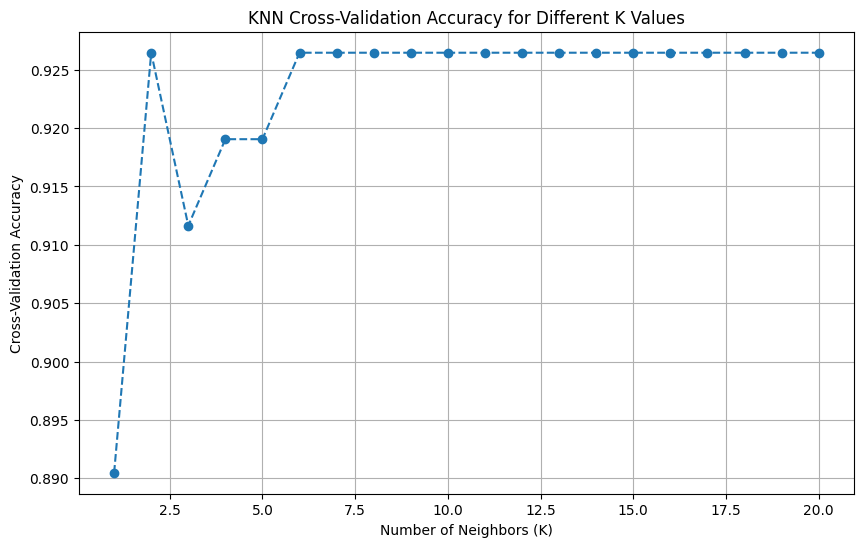

Optimal K: 2 with Cross-Validation Accuracy: 0.9265


In [ ]:
# Load and preprocess data
data = pd.read_csv('MBA.csv')  

# Handle missing values for 'admission' and numerical columns
data = data.dropna(subset=['admission'])  # Drop rows where 'admission' is missing
numerical_cols = ['gpa', 'gmat', 'work_exp']
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Fill missing values for categorical variables
data['race'] = data['race'].fillna('Unknown')
data['work_industry'] = data['work_industry'].fillna('Unknown')

# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['gender', 'major', 'race', 'work_industry']
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Define features and target
X = data[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = data['admission']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Optimize KNN with cross-validation
k_range = range(1, 21)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot KNN performance
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='--')
plt.title('KNN Cross-Validation Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid()
plt.show()

# Print optimal K value
optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal K: {optimal_k} with Cross-Validation Accuracy: {max(k_scores):.4f}")


#



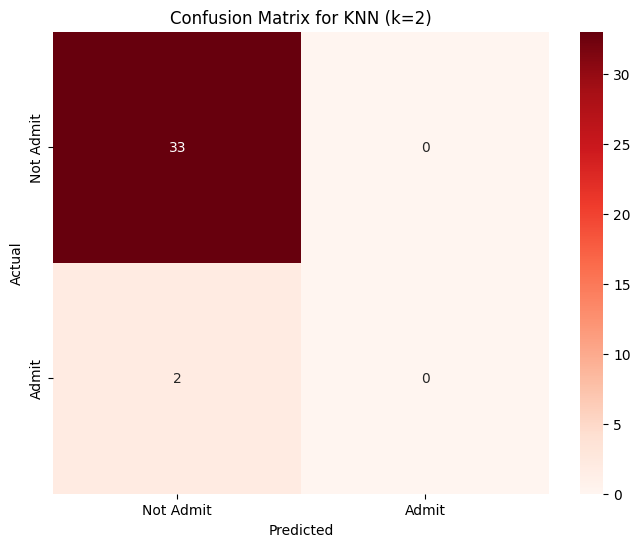

In [13]:
# Visualize confusion matrix for the best K
optimal_k = k_range[np.argmax(k_scores)]
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Admit', 'Admit'], yticklabels=['Not Admit', 'Admit'])
plt.title(f'Confusion Matrix for KNN (k={optimal_k})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#The maximum value occurs in the Not Admitted Column which implies that 33 students have still not been admitted into the MBA Course


<Figure size 1200x1000 with 0 Axes>

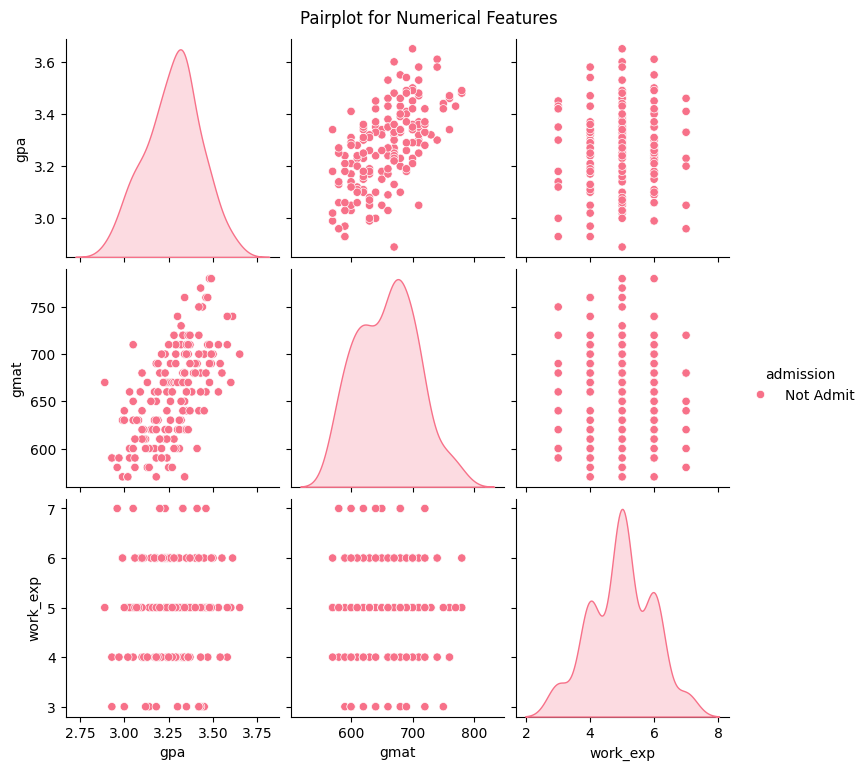

In [5]:
# Pairplot for numerical features
numerical_data = data[['gpa', 'gmat', 'work_exp', 'admission']]
numerical_data['admission'] = numerical_data['admission'].apply(lambda x: 'Admit' if x == 1 else 'Not Admit')
plt.figure(figsize=(12, 10))
sns.pairplot(numerical_data, hue='admission', palette='husl')
plt.suptitle('Pairplot for Numerical Features', y=1.02)
plt.show()

#Different visualisations for various numerical features such as GPA, GMAT and Work Experience have been made for accurate analysis of the dataset

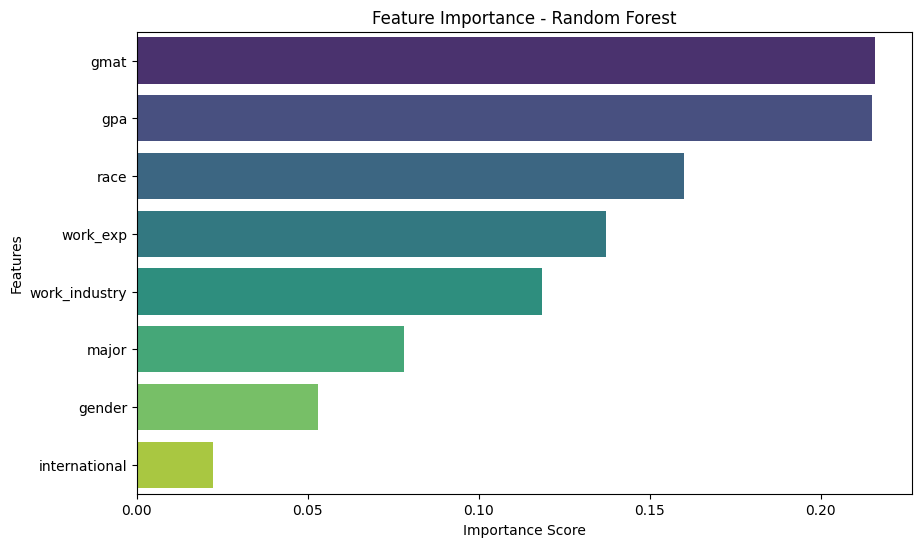

In [6]:
# Visualize feature importance for RandomForest as comparison
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#Using the RandomForest Library we have successfully made a barplot for the various features in the dataset after training them with a random state value of 42

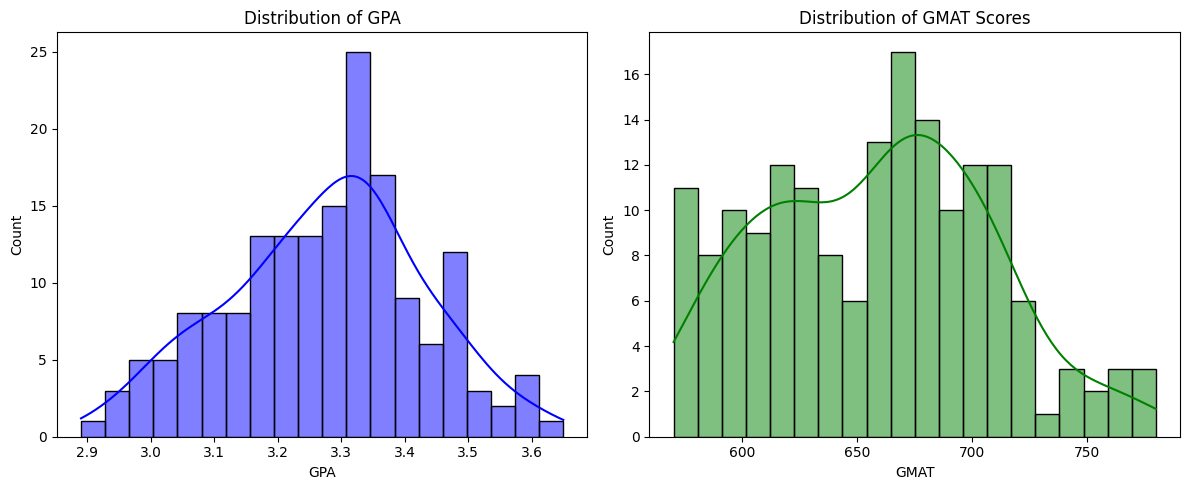

In [7]:
# Distribution plot for GPA and GMAT
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['gpa'], kde=True, color='blue', bins=20)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data['gmat'], kde=True, color='green', bins=20)
plt.title('Distribution of GMAT Scores')
plt.xlabel('GMAT')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#We have siccessfuly plotted the distribution of GPA and GMAT and see that the highest GPA lies in the 3.3 GPA value and the highest GMAT value is approximately 675

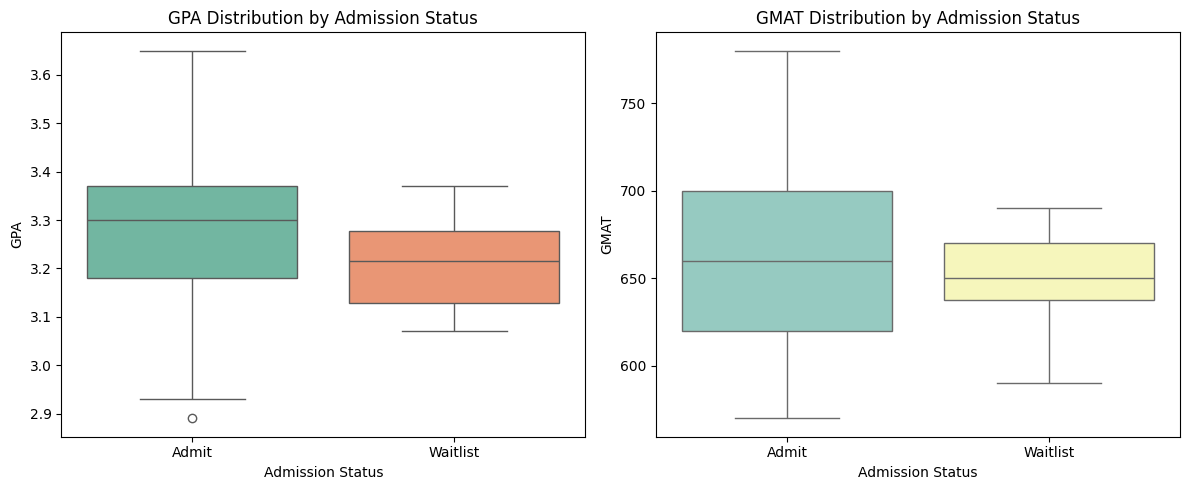

In [8]:
# Boxplots for GPA and GMAT by Admission status
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='admission', y='gpa', data=data, palette='Set2')
plt.title('GPA Distribution by Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('GPA')

plt.subplot(1, 2, 2)
sns.boxplot(x='admission', y='gmat', data=data, palette='Set3')
plt.title('GMAT Distribution by Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('GMAT')
plt.tight_layout()
plt.show()

#Boxplot successfully shows how many students have been admitted or not based on their GPA and GMAT scores

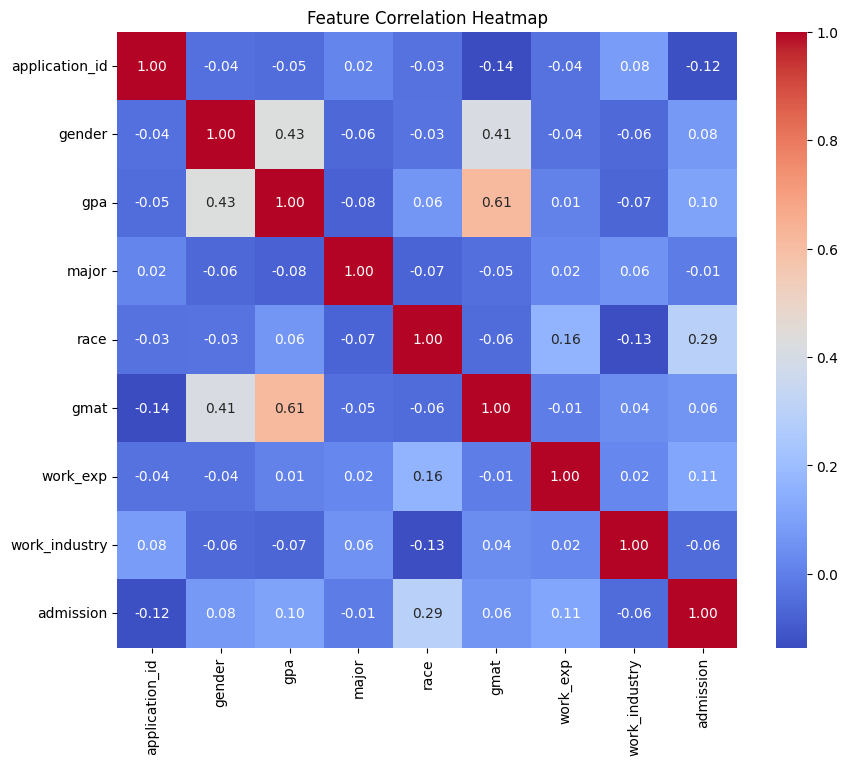

In [ ]:
# Ensure 'admission' is numerical
data['admission'] = data['admission'].apply(lambda x: 1 if x == 'Admit' else 0)

# Create a new DataFrame with only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Heatmap of feature correlations
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

#Heatmap shows correlation between different features in the dataset thus helping in the analysis of the dataset


In [11]:
# Print optimal K value
print(f"Optimal K: {optimal_k} with Cross-Validation Accuracy: {max(k_scores):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

#After successfully training the model, we generate the classification report which gives the accurate values for the overall precision, recall, f1-score, support, and accuracy for macro avg and weighted avg

Optimal K: 2 with Cross-Validation Accuracy: 0.9265
Classification Report:
              precision    recall  f1-score   support

       Admit       0.94      1.00      0.97        33
    Waitlist       0.00      0.00      0.00         2

    accuracy                           0.94        35
   macro avg       0.47      0.50      0.49        35
weighted avg       0.89      0.94      0.92        35

